In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [65]:
df=pd.read_csv('house_price.csv')

In [66]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [68]:
df_na=pd.DataFrame(df.isna().sum()/len(df)*100,columns=['NA Percentage'])

In [69]:
df_na.reset_index(drop=False,inplace=True)

In [70]:
df_na.rename(columns={'index':'Columns'},inplace=True)

In [71]:
df_na

,Columns,NA Percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000
...,...,...
76,MoSold,0.000000
77,YrSold,0.000000
78,SaleType,0.000000
79,SaleCondition,0.000000


In [72]:
for i in df_na['NA Percentage']:
    print(i)

0.0
0.0
0.0
17.73972602739726
0.0
0.0
93.76712328767123
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.547945205479452
0.547945205479452
0.0
0.0
0.0
2.5342465753424657
2.5342465753424657
2.6027397260273974
2.5342465753424657
0.0
2.6027397260273974
0.0
0.0
0.0
0.0
0.0
0.0
0.0684931506849315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
47.26027397260274
5.5479452054794525
5.5479452054794525
5.5479452054794525
0.0
0.0
5.5479452054794525
5.5479452054794525
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.52054794520548
80.75342465753424
96.30136986301369
0.0
0.0
0.0
0.0
0.0
0.0


## 1Handling Missing Values

In [73]:
lis1=list(df_na[df_na['NA Percentage']>40]['Columns'])

In [74]:
lis1

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [75]:
df.drop(lis1,axis=1,inplace=True)

In [76]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [77]:
df.drop('Id',axis=1,inplace=True)

In [78]:
df_na[(df_na['NA Percentage']>5)&(df_na['NA Percentage']<40)]['Columns']

3      LotFrontage
58      GarageType
59     GarageYrBlt
60    GarageFinish
63      GarageQual
64      GarageCond
Name: Columns, dtype: object

In [79]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [80]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [81]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [82]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [83]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [84]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [85]:
df.dropna(inplace=True)

In [86]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [87]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1050
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         641
Length: 75, dtype: int64

In [88]:
for i in df:
    print(i)
    print(df[i].nunique())

MSSubClass
15
MSZoning
5
LotFrontage
111
LotArea
1050
Street
2
LotShape
4
LandContour
4
Utilities
2
LotConfig
5
LandSlope
3
Neighborhood
25
Condition1
9
Condition2
8
BldgType
5
HouseStyle
8
OverallQual
10
OverallCond
9
YearBuilt
112
YearRemodAdd
61
RoofStyle
6
RoofMatl
8
Exterior1st
14
Exterior2nd
16
MasVnrType
4
MasVnrArea
325
ExterQual
4
ExterCond
5
Foundation
5
BsmtQual
4
BsmtCond
4
BsmtExposure
4
BsmtFinType1
6
BsmtFinSF1
632
BsmtFinType2
6
BsmtFinSF2
143
BsmtUnfSF
776
TotalBsmtSF
715
Heating
4
HeatingQC
5
CentralAir
2
Electrical
5
1stFlrSF
739
2ndFlrSF
410
LowQualFinSF
23
GrLivArea
850
BsmtFullBath
4
BsmtHalfBath
3
FullBath
4
HalfBath
3
BedroomAbvGr
8
KitchenAbvGr
4
KitchenQual
4
TotRmsAbvGrd
11
Functional
7
Fireplaces
4
GarageType
6
GarageYrBlt
98
GarageFinish
3
GarageCars
5
GarageArea
436
GarageQual
5
GarageCond
5
PavedDrive
3
WoodDeckSF
273
OpenPorchSF
201
EnclosedPorch
117
3SsnPorch
20
ScreenPorch
76
PoolArea
8
MiscVal
20
MoSold
12
YrSold
5
SaleType
9
SaleCondition
6
SalePrice

In [89]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1366,60,RL,68.0,9179,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Abnorml,193000
359,60,RL,78.0,12011,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,374,0,0,6,2006,WD,Normal,280000
550,120,RL,53.0,4043,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,200,0,0,10,2008,COD,Abnorml,140000
871,60,RL,70.0,8750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,200500
1411,50,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,140000
693,30,RL,60.0,5400,Pave,Reg,Lvl,AllPub,Corner,Sev,...,112,0,0,0,0,12,2006,WD,Abnorml,108480
19,20,RL,70.0,7560,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,COD,Abnorml,139000
83,20,RL,80.0,8892,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,COD,Normal,126500
134,20,RL,78.0,10335,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,180,0,0,0,0,7,2006,WD,Normal,180000
256,60,FV,64.0,8791,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,207500


In [90]:
for i in df:
    print(i)
    print(df[i].unique())

MSSubClass
[ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          66.         101.          57.
  44.         110.          98.          47.         108.
 112.          74.         115.          61.          48.
  33.          52.         100.          24.          89.
  63.          76.          72.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  94.          34.          90.          55.          88.
  82.          71.         120.         107.          92.
 134.          62.          86.         141.          97.
  54.          64.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.         140.          35.
  37

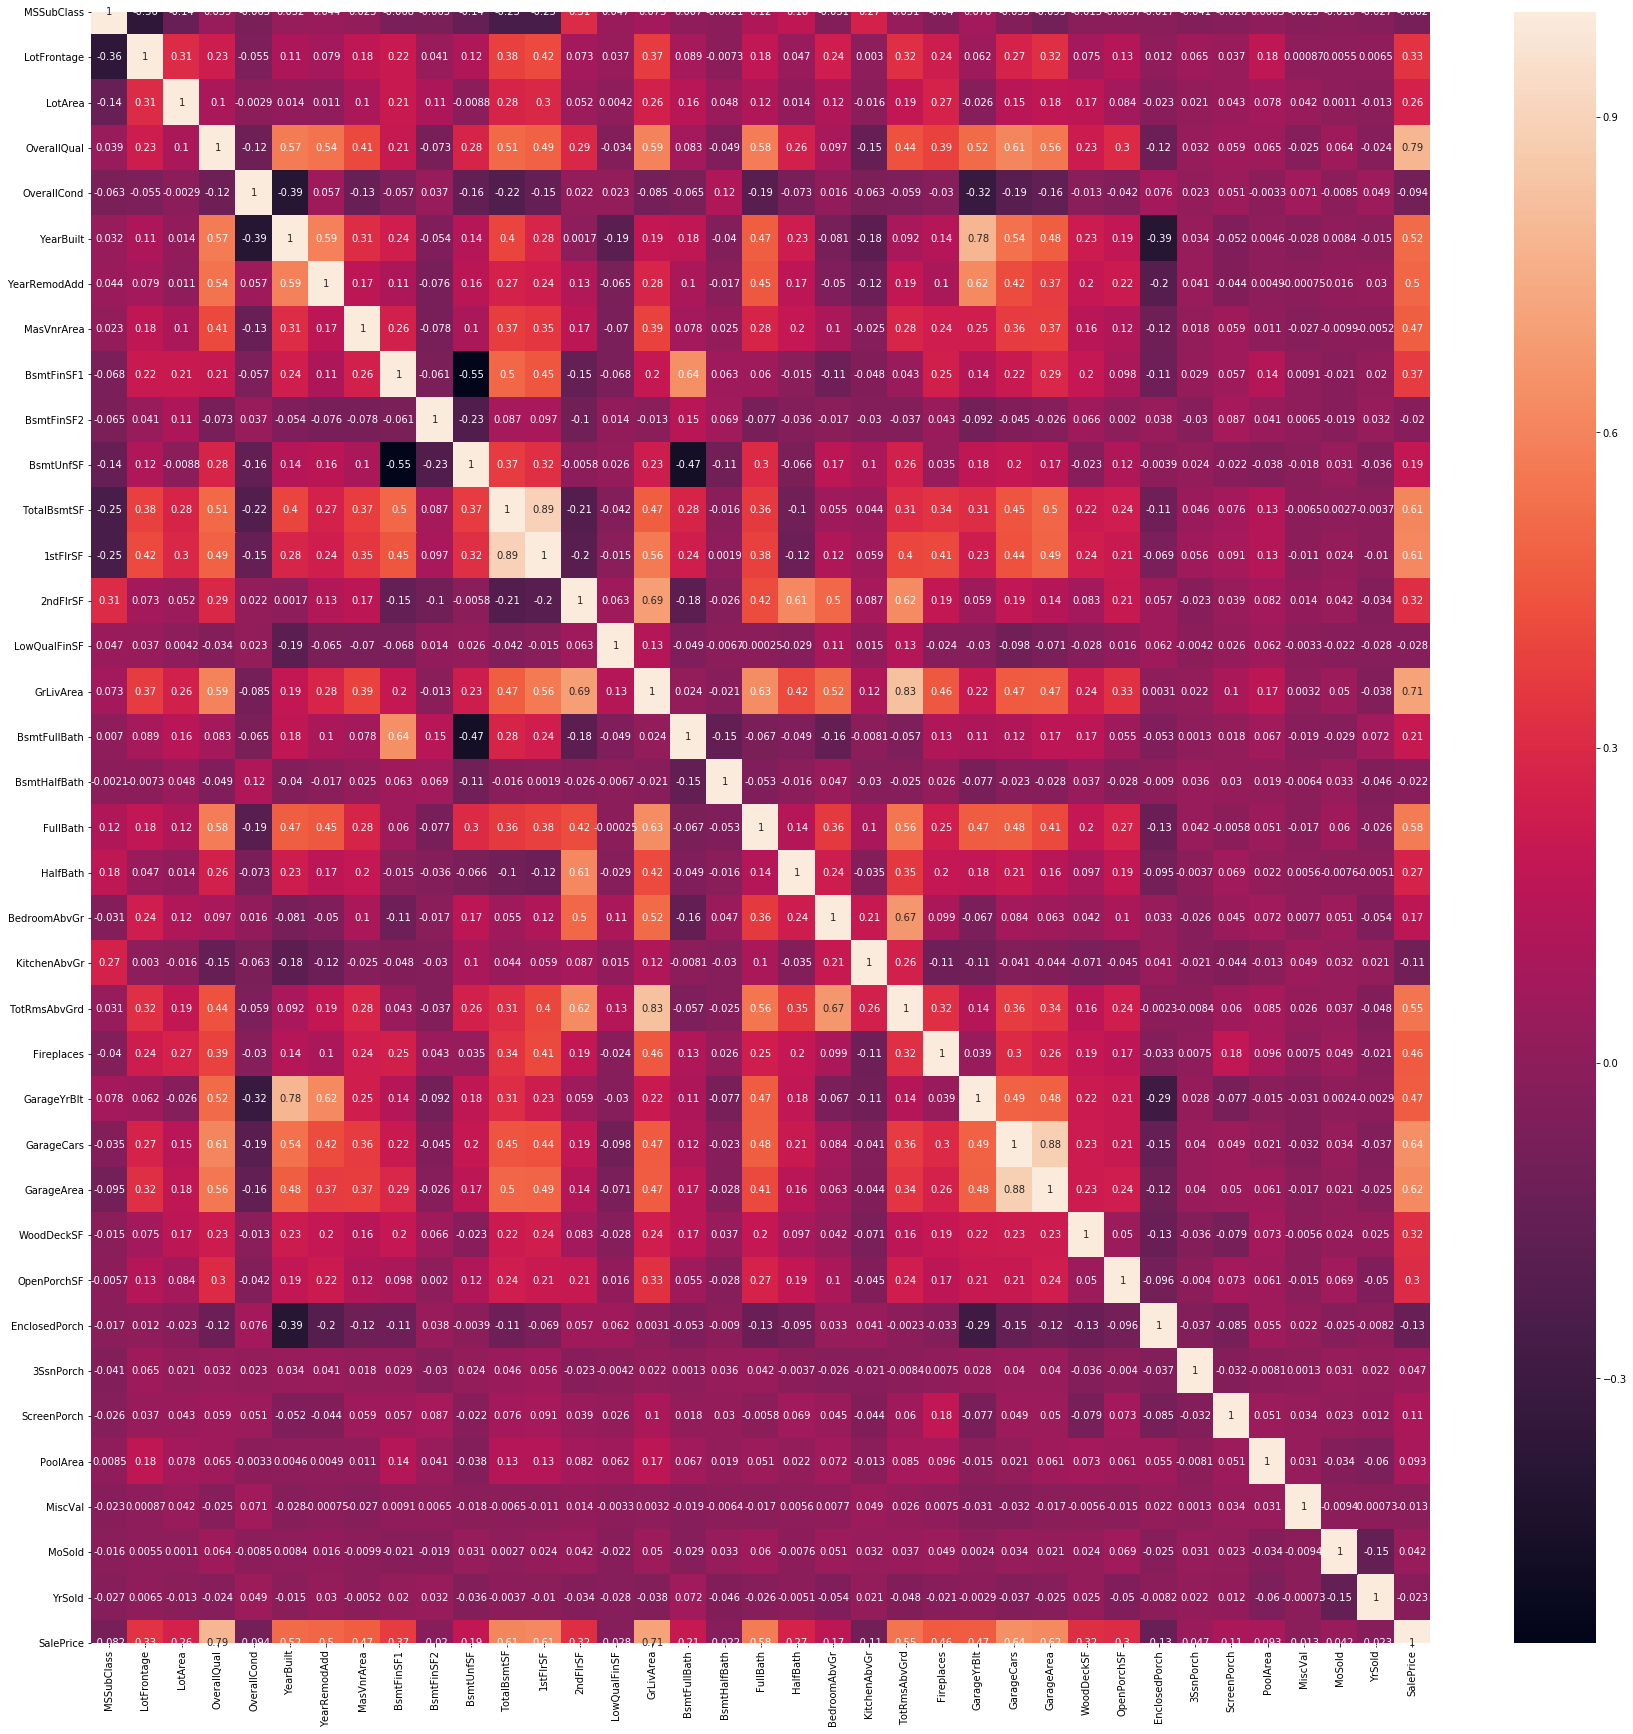

In [91]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [92]:
num_col=df.select_dtypes(include=['int64','float'])

In [93]:
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

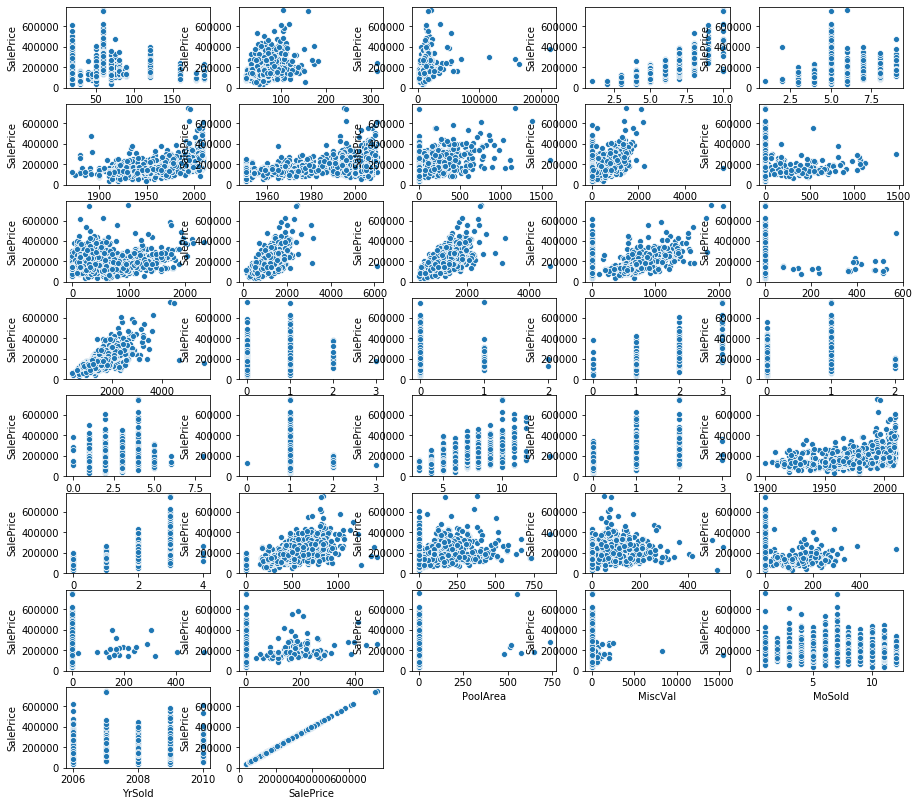

In [94]:
plt.figure(figsize=(15,14))
count=1
for i in num_col:
    plt.subplot(8,5,count)
    sns.scatterplot(x=i,y='SalePrice',data=df)
    count+=1
plt.show()

In [95]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
92,30,RL,80.000000,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,...,44,0,0,0,0,8,2009,WD,Normal,163500
341,20,RH,60.000000,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,9,2009,WD,Normal,82000
721,120,RM,70.049958,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,143000
1134,60,RL,57.000000,8773,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,169000
833,20,RL,100.000000,10004,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,152,0,0,2,2009,WD,Normal,167000
1426,60,RL,81.000000,10944,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,WD,Normal,271000
1326,30,RH,70.000000,4270,Pave,Reg,Bnk,AllPub,Inside,Mod,...,286,0,0,0,0,5,2007,WD,Normal,79000
1021,20,RL,64.000000,7406,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,194000
60,20,RL,63.000000,13072,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,New,Partial,158000
1387,50,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,CWD,Family,136000


In [96]:
cat_col=df.select_dtypes(include='O')

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le=LabelEncoder()

In [99]:
for i in cat_col:
    model=le.fit(df[i])
    df[i]=model.transform(df[i])

In [100]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [103]:
X=df[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']]

In [104]:
y=df['SalePrice']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
reg=LinearRegression()

In [109]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_train_pred=reg.predict(X_train)

In [111]:
y_test_pred=reg.predict(X_test)

In [112]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    print('R2 score:{}  |  RMSE:{}'.format(round(r2,2),round(rmse,2)))

In [114]:
print('Training Performance')
model_performance(y_train,y_train_pred)
print('Testing Performance')
model_performance(y_test,y_test_pred)

Training Performance
R2 score:0.79  |  RMSE:35952.0
Testing Performance
R2 score:0.6  |  RMSE:51589.98
